# Import libraries

In [1]:
import numpy as np
import pandas as pd

import datetime as dt

import requests
import yfinance as yf
import pandas_datareader.data as web

# Extract data

In [2]:
years = 10
dt_start = (dt.datetime.now() - dt.timedelta(days=years*365)).date()
dt_end=dt.datetime.now().date()

print('Extraindo informações de {} até {}'.format(dt_start, dt_end))

Extraindo informações de 2015-04-08 até 2025-04-05


### yfinance

| **Indicator**        | **Ticker (Yahoo Finance)** | **Description** |
|---------------------|--------------------------|-------------|
| **IBOVESPA**       | `^BVSP`                   | Brazil Stock Market Index |
| **Commodities**     | `GC=F`, `CL=F`, `SB=F`, `ZC=F` | Gold, Crude Oil, Sugar, Corn |
| **Stock Market Index (S&P 500)** | `^GSPC` | Standard & Poor’s 500 (S&P 500) Index |
| **Cryptocurrency (Bitcoin)** | `BTC-USD` | Bitcoin price in USD |

In [3]:
# Define the IBOVESPA ticker symbol used on Yahoo Finance
tickers = ["^BVSP","^GSPC","BTC-USD", "GC=F", "CL=F", "SB=F"]

In [4]:
# Download historical data (default is daily interval)
# You can adjust the period (e.g., '1y', '5y', 'max') or set specific dates
df_yf = yf.download(tickers, start=dt_start, end=dt_end).ffill()

# Ensure the 'Date' column exists and is in datetime format before setting it as the index
if 'Date' in df_yf.columns:
    df_yf['Date'] = pd.to_datetime(df_yf['Date'])
    df_yf.set_index('Date', inplace=True)
else:
    print("The 'Date' column is not present in the dataset.")

# Display the first few rows
df_yf.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed

The 'Date' column is not present in the dataset.


Price              Close                                               \
Ticker           BTC-USD       CL=F         GC=F       SB=F     ^BVSP   
Date                                                                    
2025-03-31  82548.914062  71.480003  3122.800049  18.860001  130260.0   
2025-04-01  85169.171875  71.199997  3118.899902  19.350000  131147.0   
2025-04-02  82485.710938  71.709999  3139.899902  19.590000  131190.0   
2025-04-03  83102.828125  66.949997  3097.000000  19.110001  131141.0   
2025-04-04  83843.804688  61.990002  3012.000000  18.840000  127256.0   

Price                            High                                     ...  \
Ticker            ^GSPC       BTC-USD       CL=F         GC=F       SB=F  ...   
Date                                                                      ...   
2025-03-31  5611.850098  83870.125000  71.830002  3132.500000  19.320000  ...   
2025-04-01  5633.069824  85487.367188  72.099998  3149.500000  19.400000  ...   
2025-04-02  5670.970215  88466.953125  72.279999  3168.600098  19.629999  ...   
2025-04-03  5396.520020  83909.296875  70.410004  3166.899902  19.540001  ...   
2025-04-04  5074.080078  84696.148438  66.900002  3127.699951  19.110001  ...   

Price              Open                                         Volume  \
Ticker             GC=F       SB=F     ^BVSP        ^GSPC      BTC-USD   
Date                                                                     
2025-03-31  3091.000000  19.000000  131900.0  5527.910156  29004228247   
2025-04-01  3129.699951  18.889999  130267.0  5597.529785  28175650319   
2025-04-02  3120.699951  19.360001  131151.0  5580.759766  47584398470   
2025-04-03  3150.000000  19.340000  131185.0  5492.740234  36852112080   
2025-04-04  3110.500000  19.070000  131139.0  5292.140137  45157640207   

Price                                                            
Ticker          CL=F    GC=F     SB=F       ^BVSP         ^GSPC  
Date                                                             
2025-03-31  313087.0  3438.0  71622.0   9994900.0  5.257250e+09  
2025-04-01  272832.0  1721.0  50786.0   8966100.0  4.434500e+09  
2025-04-02  286501.0  5946.0  55648.0   8819500.0  4.243830e+09  
2025-04-03  459238.0  5516.0  61735.0  12327500.0  7.210470e+09  
2025-04-04  459238.0  5516.0  61735.0  13176400.0  8.853500e+09  

[5 rows x 30 columns]

| **Exchange Rate (Forex)** | `USDBRL=X`, `EURBRL=X` | USD/BRL (Dollar to Real), EUR/BRL (Euro to Real) |

In [5]:
# Flatten the multi-level column index
df_yf.columns = ['_'.join(col).strip() for col in df_yf.columns.values]

# Display the first few rows of the updated dataset
df_yf.tail()

,Close_BTC-USD,Close_CL=F,Close_GC=F,Close_SB=F,Close_^BVSP,Close_^GSPC,High_BTC-USD,High_CL=F,High_GC=F,High_SB=F,...,Open_GC=F,Open_SB=F,Open_^BVSP,Open_^GSPC,Volume_BTC-USD,Volume_CL=F,Volume_GC=F,Volume_SB=F,Volume_^BVSP,Volume_^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-31,82548.914062,71.480003,3122.800049,18.860001,130260.0,5611.850098,83870.125000,71.830002,3132.500000,19.320000,...,3091.000000,19.000000,131900.0,5527.910156,29004228247,313087.0,3438.0,71622.0,9994900.0,5.257250e+09
2025-04-01,85169.171875,71.199997,3118.899902,19.350000,131147.0,5633.069824,85487.367188,72.099998,3149.500000,19.400000,...,3129.699951,18.889999,130267.0,5597.529785,28175650319,272832.0,1721.0,50786.0,8966100.0,4.434500e+09
2025-04-02,82485.710938,71.709999,3139.899902,19.590000,131190.0,5670.970215,88466.953125,72.279999,3168.600098,19.629999,...,3120.699951,19.360001,131151.0,5580.759766,47584398470,286501.0,5946.0,55648.0,8819500.0,4.243830e+09
2025-04-03,83102.828125,66.949997,3097.000000,19.110001,131141.0,5396.520020,83909.296875,70.410004,3166.899902,19.540001,...,3150.000000,19.340000,131185.0,5492.740234,36852112080,459238.0,5516.0,61735.0,12327500.0,7.210470e+09
2025-04-04,83843.804688,61.990002,3012.000000,18.840000,127256.0,5074.080078,84696.148438,66.900002,3127.699951,19.110001,...,3110.500000,19.070000,131139.0,5292.140137,45157640207,459238.0,5516.0,61735.0,13176400.0,8.853500e+09


### bcb - Banco Central do Brasil

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [6]:
series_br = {
    'SELIC_Efetiva_Diaria': 11,
    'SELIC_Meta_Anual': 432,
    'IPCA_Mensal': 433,
    'IGP_M_Mensal': 189,
    'INCC_Mensal': 192,
    'Indice_Condicoes_Econ_BR': 27574,
    'Indice_Condicoes_Econ_BR_USD': 29042,
    'Salario_Minimo': 1619,
    'IBC_BR': 24363,
    'Populacao_BR': 21774,
    'PIB_Trimestral_Real': 4380,
    'PIB_Anual_Corrente': 7326,
    'Deflator_Implicito_PIB': 1211
}


In [7]:
# Função para buscar uma série do SGS
def get_bcb_series(sgs_code, start,end):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{sgs_code}/dados'
    
    # Monta os parâmetros corretamente no formato da API
    params = {
        'formato': 'json',
        'dataInicial': start.strftime('%d/%m/%Y'),  # Formato dd/mm/yyyy
        'dataFinal': end.strftime('%d/%m/%Y'),      # Formato dd/mm/yyyy
    }

    # Requisição
    response = requests.get(url, params=params)
    data = response.json()

    # Verifica se a resposta está vazia
    if not data:
        print(f"Warning: No data found for SGS code {sgs_code} between {start} and {end}.")
        return data
    
    return data

In [8]:
# Baixar todas as séries e armazenar num dicionário
br_dataframes = {}
for name, code in series_br.items():
    print(f'Baixando {name} (código {code})...')
    try:
        br_dataframes[name] = pd.DataFrame(get_bcb_series(code, start=dt_start,end=dt_end))
    except Exception as e:
        print(f"Erro ao baixar a série {name} (código {code}): {e}")

Baixando SELIC_Efetiva_Diaria (código 11)...
Baixando SELIC_Meta_Anual (código 432)...
Baixando IPCA_Mensal (código 433)...
Baixando IGP_M_Mensal (código 189)...
Baixando INCC_Mensal (código 192)...
Baixando Indice_Condicoes_Econ_BR (código 27574)...
Baixando Indice_Condicoes_Econ_BR_USD (código 29042)...
Baixando Salario_Minimo (código 1619)...
Baixando IBC_BR (código 24363)...
Baixando Populacao_BR (código 21774)...
Baixando PIB_Trimestral_Real (código 4380)...
Baixando PIB_Anual_Corrente (código 7326)...
Baixando Deflator_Implicito_PIB (código 1211)...


In [9]:
# Combine all DataFrames in the dictionary into a single DataFrame
df_br = pd.concat(
    {key: df.assign(data=pd.to_datetime(df['data'], format='%d/%m/%Y'))
          .set_index('data')['valor']
     for key, df in br_dataframes.items()},
    axis=1
)

# Sort the DataFrame by index (date)
df_br.sort_index(inplace=True)

# Display the resulting DataFrame
df_br.ffill().tail()

,SELIC_Efetiva_Diaria,SELIC_Meta_Anual,IPCA_Mensal,IGP_M_Mensal,INCC_Mensal,Indice_Condicoes_Econ_BR,Indice_Condicoes_Econ_BR_USD,Salario_Minimo,IBC_BR,Populacao_BR,PIB_Trimestral_Real,PIB_Anual_Corrente,Deflator_Implicito_PIB
data,,,,,,,,,,,,,
2025-04-01,0.052531,14.25,1.31,-0.34,0.39,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80
2025-04-02,0.052531,14.25,1.31,-0.34,0.39,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80
2025-04-03,0.052531,14.25,1.31,-0.34,0.39,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80
2025-04-04,0.052531,14.25,1.31,-0.34,0.39,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80
2025-04-05,0.052531,14.25,1.31,-0.34,0.39,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80


### pandas_datareader

In [10]:
# Dicionário com os códigos do FRED e nomes mais amigáveis
series_usa = {
    'DEXBZUS': 'BRL_USD',
    'CPIAUCSL': 'CPI_USA',
}

In [11]:
# Puxar todas as séries e juntar num único DataFrame
df_usa = pd.concat(
    [web.DataReader(code, 'fred', dt_start, dt_end).rename(columns={code: name})
     for code, name in series_usa.items()],
    axis=1
)

In [12]:
df_usa.tail()

,BRL_USD,CPI_USA
DATE,,
2025-03-24,5.7295,NaN
2025-03-25,5.6837,NaN
2025-03-26,5.7386,NaN
2025-03-27,5.7339,NaN
2025-03-28,5.7672,NaN


## Load dataset

In [13]:
# Juntar os três DataFrames com base no índice
dataset = df_yf.join([df_br, df_usa], how='left')

dataset.ffill(inplace=True) # Preencher valores ausentes com o último valor conhecido
dataset.bfill(inplace=True) # Preencher valores ausentes com o último valor conhecido

In [14]:
# Exibir as primeiras linhas do DataFrame resultante
print(dataset.head())

            Close_BTC-USD  Close_CL=F   Close_GC=F  Close_SB=F  Close_^BVSP  \
Date                                                                          
2015-04-08     245.022003   50.419998  1203.099976       12.97      53661.0   
2015-04-09     243.675995   50.790001  1193.599976       12.80      53803.0   
2015-04-10     236.072006   51.639999  1204.599976       12.83      54214.0   
2015-04-11     236.552002   51.639999  1204.599976       12.83      54214.0   
2015-04-12     236.153000   51.639999  1204.599976       12.83      54214.0   

            Close_^GSPC  High_BTC-USD  High_CL=F    High_GC=F  High_SB=F  ...  \
Date                                                                      ...   
2015-04-08  2081.899902    253.847000      53.23  1211.400024      13.13  ...   
2015-04-09  2091.179932    246.117996      52.07  1202.500000      13.03  ...   
2015-04-10  2102.060059    243.694000      51.93  1209.599976      12.88  ...   
2015-04-11  2102.060059    239.537003    

In [15]:
# Exibir as primeiras linhas do DataFrame resultante
dataset.tail()

,Close_BTC-USD,Close_CL=F,Close_GC=F,Close_SB=F,Close_^BVSP,Close_^GSPC,High_BTC-USD,High_CL=F,High_GC=F,High_SB=F,...,Indice_Condicoes_Econ_BR,Indice_Condicoes_Econ_BR_USD,Salario_Minimo,IBC_BR,Populacao_BR,PIB_Trimestral_Real,PIB_Anual_Corrente,Deflator_Implicito_PIB,BRL_USD,CPI_USA
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-31,82548.914062,71.480003,3122.800049,18.860001,130260.0,5611.850098,83870.125000,71.830002,3132.500000,19.320000,...,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80,5.7672,319.775
2025-04-01,85169.171875,71.199997,3118.899902,19.350000,131147.0,5633.069824,85487.367188,72.099998,3149.500000,19.400000,...,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80,5.7672,319.775
2025-04-02,82485.710938,71.709999,3139.899902,19.590000,131190.0,5670.970215,88466.953125,72.279999,3168.600098,19.629999,...,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80,5.7672,319.775
2025-04-03,83102.828125,66.949997,3097.000000,19.110001,131141.0,5396.520020,83909.296875,70.410004,3166.899902,19.540001,...,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80,5.7672,319.775
2025-04-04,83843.804688,61.990002,3012.000000,18.840000,127256.0,5074.080078,84696.148438,66.900002,3127.699951,19.110001,...,461.10,182.79,1518.00,146.96,212584,966150.6,3.40,3.80,5.7672,319.775


In [16]:
dataset.loc['2025-01-02']

Close_BTC-USD                       96886.875
Close_CL=F                          73.129997
Close_GC=F                        2658.899902
Close_SB=F                              19.73
Close_^BVSP                          120125.0
Close_^GSPC                       5868.549805
High_BTC-USD                     97739.820312
High_CL=F                           73.730003
High_GC=F                         2663.100098
High_SB=F                           19.940001
High_^BVSP                           120782.0
High_^GSPC                        5935.089844
Low_BTC-USD                      94201.570312
Low_CL=F                            71.790001
Low_GC=F                               2633.0
Low_SB=F                            19.200001
Low_^BVSP                            119120.0
Low_^GSPC                         5829.529785
Open_BTC-USD                     94416.289062
Open_CL=F                           71.849998
Open_GC=F                              2633.0
Open_SB=F                         

In [17]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 2015-04-08 to 2025-04-04
Freq: D
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close_BTC-USD                 3650 non-null   float64
 1   Close_CL=F                    3650 non-null   float64
 2   Close_GC=F                    3650 non-null   float64
 3   Close_SB=F                    3650 non-null   float64
 4   Close_^BVSP                   3650 non-null   float64
 5   Close_^GSPC                   3650 non-null   float64
 6   High_BTC-USD                  3650 non-null   float64
 7   High_CL=F                     3650 non-null   float64
 8   High_GC=F                     3650 non-null   float64
 9   High_SB=F                     3650 non-null   float64
 10  High_^BVSP                    3650 non-null   float64
 11  High_^GSPC                    3650 non-null   float64
 12  Low_BTC-USD                   3650 n

In [18]:
dataset.iloc[:, 4]

Date
2015-04-08     53661.0
2015-04-09     53803.0
2015-04-10     54214.0
2015-04-11     54214.0
2015-04-12     54214.0
                ...   
2025-03-31    130260.0
2025-04-01    131147.0
2025-04-02    131190.0
2025-04-03    131141.0
2025-04-04    127256.0
Freq: D, Name: Close_^BVSP, Length: 3650, dtype: float64

In [19]:
# Save to a CSV file
dataset.to_csv('../data/raw/dataset.csv')

## Data processing

In [20]:
'''
import pandas as pd
import numpy as np
import datetime as dt

dataset = pd.read_csv('../data/raw/dataset.csv', index_col=0, parse_dates=True)
'''

"\nimport pandas as pd\nimport numpy as np\nimport datetime as dt\n\ndataset = pd.read_csv('../data/raw/dataset.csv', index_col=0, parse_dates=True)\n"

In [21]:
df = pd.DataFrame(dataset)

In [22]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df = pd.DataFrame(dataset)

# ColumnTransformer usando make_column_selector
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

# Pipeline final
pipeline_process = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the pipeline on the selected data
X_all = pipeline_process.fit_transform(df)

In [34]:
from scipy.sparse import issparse

if issparse(X_all):
    X_all = X_all.toarray()

X_all.astype(np.float64)

array([[ 3.25923981e-04,  5.45775741e-01,  7.29021767e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       [ 3.13218090e-04,  5.48069194e-01,  6.83547637e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       [ 2.41438854e-04,  5.53337889e-01,  7.36201893e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       ...,
       [ 7.76651885e-01,  6.77741285e-01,  1.00000000e+00, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00],
       [ 7.82477275e-01,  6.48236529e-01,  9.79464887e-01, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00],
       [ 7.89471858e-01,  6.17492122e-01,  9.38777506e-01, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00]])

In [35]:
X_all.shape

(3650, 45)

In [76]:
# Criar os pares (X, y) para todo o histórico
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

sequence_length = 7
target_column_index = 4  # o fechamento do ibovespa está no íncide 4 de X_all

generator = TimeseriesGenerator(
    X_all, X_all[:, target_column_index],
    length=sequence_length, batch_size=16
)

In [77]:
generator.data

array([[ 3.25923981e-04,  5.45775741e-01,  7.29021767e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       [ 3.13218090e-04,  5.48069194e-01,  6.83547637e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       [ 2.41438854e-04,  5.53337889e-01,  7.36201893e-02, ...,
         4.92230700e+05, -3.28000000e+00,  8.10000000e+00],
       ...,
       [ 7.76651885e-01,  6.77741285e-01,  1.00000000e+00, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00],
       [ 7.82477275e-01,  6.48236529e-01,  9.79464887e-01, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00],
       [ 7.89471858e-01,  6.17492122e-01,  9.38777506e-01, ...,
         9.66150600e+05,  3.40000000e+00,  3.80000000e+00]])

In [78]:
# Get the first batch from the generator
X_batch, y_batch = generator[0]

# Print the shapes of the input (X) and target (y)
print("X shape:", X_batch.shape)
print("y shape:", y_batch.shape)

X shape: (16, 7, 45)
y shape: (16,)


## SLIP DATA

## Modeling

In [111]:
generator[0][0].shape[2]

45

In [115]:
# 2. Modelo LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(100, input_shape=(generator[0][0].shape[1], generator[0][0].shape[2])),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 3. Treinamento
model.fit(generator, epochs=50)

Epoch 1/50


c:\Repositories\ds-lstm-ibov\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2181
Epoch 2/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1539
Epoch 3/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127
Epoch 4/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0979
Epoch 5/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0867
Epoch 6/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0741
Epoch 7/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742
Epoch 8/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0657
Epoch 9/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0617
Epoch 10/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0665
Epoch 11/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0587
Epoch 12/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0635
Epoch 13/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0606
Epoch 14/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0621
Epoch 15/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0670


## Predict

In [116]:
# Últimos 7 dias de X
last_window = X_all[-7:]  # shape (7, features)
last_window = last_window.reshape((1, 7, X_all.shape[1]))  # (1, 7, features)

# Previsão do próximo dia
next_prediction = model.predict(last_window)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


In [117]:
next_prediction[0,0]

np.float32(0.7874726)

In [118]:
ct = pipeline_process.named_steps['preprocessor']

In [119]:
numeric_cols = ct.transformers_[0][2]  # Pega os nomes/índices das colunas usadas no primeiro transformador
scaler = ct.transformers_[0][1]        # Pega o StandardScaler associado

In [120]:
numeric_cols[4]

'Close_^BVSP'

In [121]:
scaler

MinMaxScaler()

In [122]:
# Find the integer index of the target column in numeric_cols
target_in_scaler_index = numeric_cols.index('Close_^BVSP')

dummy_input = np.zeros((1, len(numeric_cols)))
dummy_input[0, target_in_scaler_index] = next_prediction[0, 0]

inv = scaler.inverse_transform(dummy_input)
next_prediction_real = inv[0, target_in_scaler_index]

In [123]:
# Reshape para 2D: (7, features)
last_window_2d = last_window.reshape(-1, X_all.shape[1])

# Selecionar apenas as colunas numéricas correspondentes a numeric_cols
last_window_2d_numeric = last_window_2d[:, :len(numeric_cols)]

# Inverter a transformação
last_window_real_numeric = scaler.inverse_transform(last_window_2d_numeric)

# Recriar o array completo com os valores invertidos
last_window_real = last_window.copy()
last_window_real[:, :, :len(numeric_cols)] = last_window_real_numeric

# Se quiser, pode voltar ao shape 3D depois
last_window_real = last_window_real.reshape(1, 7, X_all.shape[1])


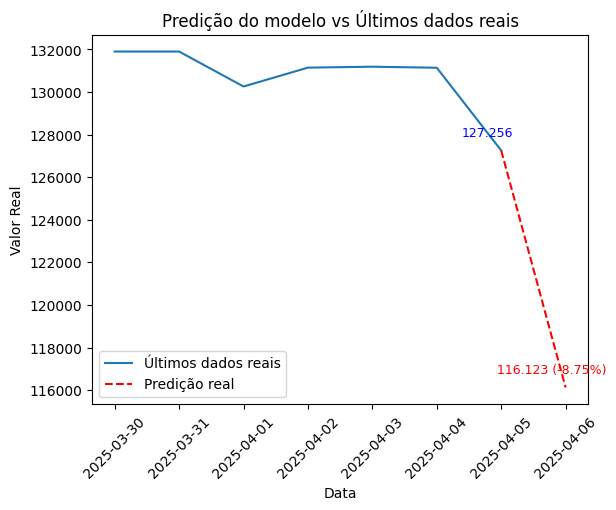

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Eixo X para a janela de entrada (últimos 7 dias)
x_input_dates = pd.date_range(end=dt_end, periods=sequence_length).strftime('%Y-%m-%d')

# Eixo X para a predição (logo após a janela)
x_pred_dates = [x_input_dates[-1], (pd.to_datetime(x_input_dates[-1]) + pd.Timedelta(days=1)).strftime('%Y-%m-%d')]

# Último valor real + predição real
y_pred_real = [last_window_real[0, -1, target_column_index], next_prediction_real]

# Calcular a diferença percentual entre o predito e o último real
diff_percent = ((y_pred_real[1] - y_pred_real[0]) / y_pred_real[0]) * 100

# Formatar os valores para exibição
y_pred_real_formatted = [f"{int(y):,}".replace(",", ".") for y in y_pred_real]
diff_percent_formatted = f"{diff_percent:.2f}%"

# Plot da janela de dados reais
plt.plot(x_input_dates, last_window_real[0, :, target_column_index], label='Últimos dados reais')

# Plot da predição real como linha pontilhada conectando ao último ponto real
plt.plot(x_pred_dates, y_pred_real, 'r--', label='Predição real')

# Adicionar rótulo ao último ponto real
plt.annotate(f'{y_pred_real_formatted[0]}', 
             (x_input_dates[-1], y_pred_real[0]), 
             textcoords="offset points", 
             xytext=(-10, 10), 
             ha='center', 
             fontsize=9, 
             color='blue')

# Adicionar rótulo ao ponto predito com a diferença percentual
plt.annotate(f'{y_pred_real_formatted[1]} ({diff_percent_formatted})', 
             (x_pred_dates[-1], y_pred_real[1]), 
             textcoords="offset points", 
             xytext=(-10, 10), 
             ha='center', 
             fontsize=9, 
             color='red')

# Legenda e rótulos
plt.xlabel('Data')
plt.ylabel('Valor Real')
plt.title('Predição do modelo vs Últimos dados reais')
plt.xticks(rotation=45)
plt.legend()

plt.show()
